In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('train_data_processed.csv')
df_train

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour,Year
0,5172780,1709396985476,26,18583,687462,31,813,12,0,9,...,635,2251,881,3586,5,242,6,6,5,2024
1,8470561,927712939180,33,5065,3990,38,25,9,0,17,...,635,2251,881,3586,5,242,3,6,10,2024
2,5897583,1090921697002,201,150787,807590,419,444,6,0,17,...,635,2251,881,3586,5,242,13,6,3,2024
3,3288552,1434519079555,204,108287,28575,44,1233,16,2,9,...,635,2251,881,3586,5,242,8,6,16,2024
4,4060961,1005022347708,54,528202,1458226,102,58829,7,0,9,...,635,2251,881,3586,5,242,9,6,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732638,3272416,103079215470,142,93987,15739,112,7836,7,1,19,...,635,2251,881,3586,5,242,10,6,10,2024
4732639,6701254,1683627184337,36,1001,257479,2,2,1,1,30,...,635,2251,881,3586,5,242,11,6,19,2024
4732640,5665090,1597727836318,851,31194,1518250,1,1,10,0,19,...,635,2251,881,3586,5,242,9,6,4,2024
4732641,1421470,137438957239,12,2419,1203,16,1334,9,0,13,...,635,2251,881,3586,5,242,21,5,23,2024


In [3]:
df_test = pd.read_csv('test_data_processed.csv')
df_test


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,-1,-1,-1,-1,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,6,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147883,541165881145,262,3017,227156,139,120,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,4,6,3
4147884,438086666953,1323,31001,304819,219,196,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,4,6,19
4147885,1297080124487,47,3653,7243,57,29,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,15,6,0
4147886,627065226886,70,4243,19142,1,1,-1,-1,-1,-1,...,1631,635,2251,881,3586,5,242,11,6,16


In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

In [12]:
#Splitting data
X= df_train.drop('IncidentGrade',axis=1)
y= df_train['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [13]:

#Selecting top features using anova
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(score_func=f_classif, k=15)  # Adjust k as needed
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day'],
      dtype='object')


In [14]:

X_new=X[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
X_new

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,Sha256,IpAddress,AccountSid,DeviceName,NetworkMessageId,CountryCode,Day
0,26,18583,687462,31,813,12,9,1,1296,360606,441377,153085,529644,242,6
1,33,5065,3990,38,25,9,17,0,138268,360606,441377,3142,529644,242,3
2,201,150787,807590,419,444,6,17,0,138268,360606,441377,4181,529644,242,13
3,204,108287,28575,44,1233,16,9,1,138268,360606,441377,153085,529644,242,8
4,54,528202,1458226,102,58829,7,9,0,138268,360606,441377,153085,529644,242,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732638,142,93987,15739,112,7836,7,19,0,138268,360606,441377,153085,869,242,10
4732639,36,1001,257479,2,2,1,30,0,138268,360606,32117,153085,529644,242,11
4732640,851,31194,1518250,1,1,10,19,1,138268,360606,441377,153085,402271,242,9
4732641,12,2419,1203,16,1334,9,13,1,138268,546,441377,153085,529644,242,21


In [15]:
#Training train data with selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
     

In [16]:

# Output the shapes of the training and validation sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)
     

Training set shape: (3786114, 15)
Validation set shape: (946529, 15)



Evaluating Logistic Regression Model...


c:\Users\Gautam\OneDrive\Desktop\vs\.myenv\.myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5255707960347755
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61    411114
           1       0.30      0.02      0.04    203012
           2       0.52      0.61      0.56    332403

    accuracy                           0.53    946529
   macro avg       0.45      0.45      0.40    946529
weighted avg       0.48      0.53      0.47    946529



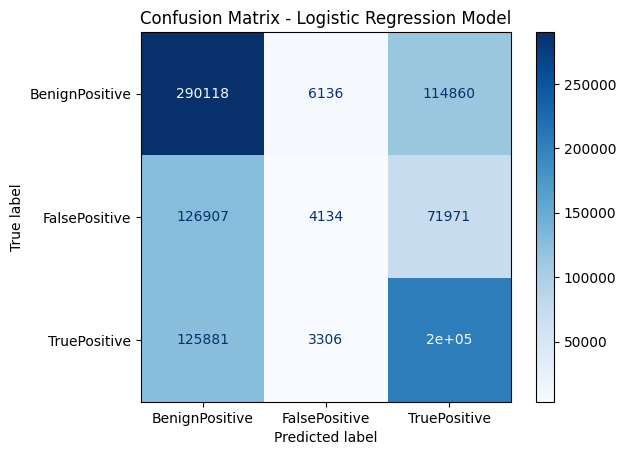

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Model
model_logistic = LogisticRegression(random_state=42)

# Print message for evaluation
print(f"\nEvaluating Logistic Regression Model...")

# Fit the logistic regression model
model_logistic.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = model_logistic.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=0))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


Evaluating RandomForest...
Accuracy: 0.7759149481949311
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80    411114
           1       0.94      0.50      0.66    203012
           2       0.97      0.69      0.81    332403

    accuracy                           0.78    946529
   macro avg       0.86      0.72      0.75    946529
weighted avg       0.84      0.78      0.77    946529



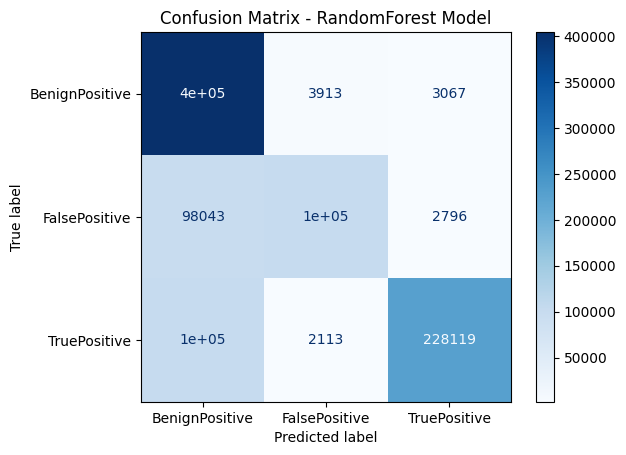

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize RandomForest with optimizations
model_rf = RandomForestClassifier(
    n_estimators=50,        # Reduce the number of trees
    max_depth=10,           # Limit the depth of the trees
    max_features='sqrt',    # Use the square root of features
    n_jobs=-1,              # Enable parallel processing
    random_state=42
)

# Print message for evaluation
print(f"\nEvaluating RandomForest...")

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest Model')
plt.show()




Evaluating XGBoost...
Accuracy: 0.9172555727294145
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    411114
           1       0.93      0.85      0.89    203012
           2       0.94      0.91      0.93    332403

    accuracy                           0.92    946529
   macro avg       0.92      0.91      0.91    946529
weighted avg       0.92      0.92      0.92    946529



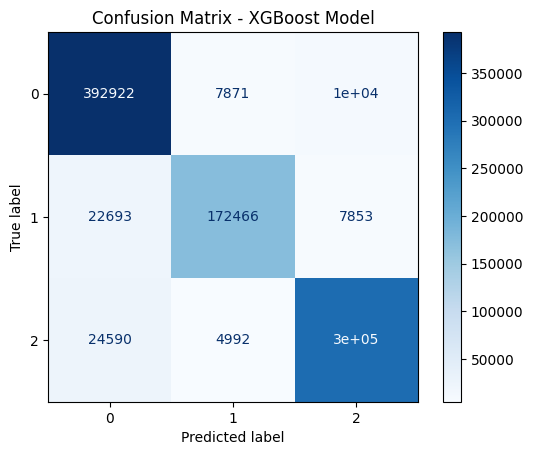

In [21]:
# Necessary imports
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the XGBoost classifier
model_xgb = XGBClassifier(random_state=42)

# Print evaluation message
print(f"\nEvaluating XGBoost...")

# Fit the model on the training data
model_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model_xgb.classes_)  # Automatically uses the class labels from the model
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model')
plt.show()



Evaluating LGBoost...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.214307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2725
[LightGBM] [Info] Number of data points in the train set: 3786114, number of used features: 15
[LightGBM] [Info] Start training from score -0.834415
[LightGBM] [Info] Start training from score -1.538647
[LightGBM] [Info] Start training from score -1.046399
Accuracy: 0.8952139871044628
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    411114
           1       0.93      0.80      0.86    203012
           2       0.94      0.88      0.91    332403

    accuracy                           0.90    946529
   macro avg       0.91      0.88      0.89    946529
weighted avg       0.90      0.90      0.89    946529



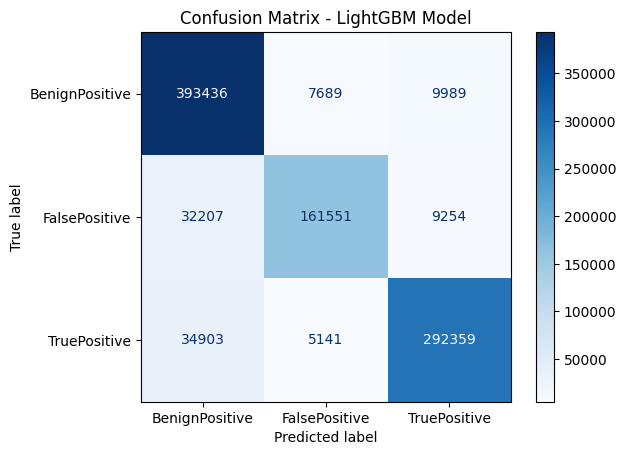

In [22]:
#LGBM
model_lgb = LGBMClassifier(random_state = 42)

#LGBoost
print(f"\nEvaluating LGBoost...")

# Fit the model
model_lgb.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = model_lgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM Model')
plt.show()


Evaluating Decision Tree...
Accuracy: 0.7740269975880295
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79    411114
           1       0.87      0.54      0.67    203012
           2       0.93      0.71      0.80    332403

    accuracy                           0.77    946529
   macro avg       0.83      0.73      0.76    946529
weighted avg       0.81      0.77      0.77    946529



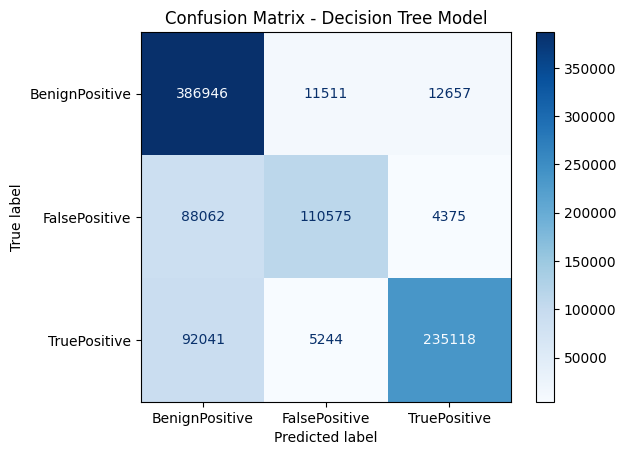

In [23]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Decision Tree with optimizations
model_dt = DecisionTreeClassifier(
    max_depth=10,            # Limit the depth of the tree
    random_state=42          # For reproducibility
)

# Print message for evaluation
print(f"\nEvaluating Decision Tree...")

# Fit the Decision Tree model
model_dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = model_dt.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [62]:
import joblib

joblib.dump(model_xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [28]:
# Error Analysis fro logistic regression
errors = (y_test !=y_pred_logistic)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted':y_pred_logistic[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
957731      1          0
397017      1          0
4270937     2          0
2381102     1          0
2392219     2          0
...       ...        ...
1125481     2          0
3302413     0          2
355619      2          0
447127      1          2
1606206     1          0

[449061 rows x 2 columns]


In [29]:
# Error Analysis for random forest
errors = (y_test != y_pred_rf)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_rf[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
397017      1          0
2381102     1          0
3611466     2          0
207923      1          0
4411750     1          0
...       ...        ...
395440      1          0
1125481     2          0
447127      1          0
1056690     2          0
1488391     0          2

[212103 rows x 2 columns]


In [30]:
# Error Analysis for lgbm
errors = (y_test != y_pred_lgb)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_lgb[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)
     

Error Analysis (Misclassifications):
         True  Predicted
1924978     0          2
207923      1          0
4221619     2          0
2809096     1          0
3457670     2          0
...       ...        ...
3135410     1          0
2858259     2          0
903427      0          1
1125481     2          0
1488391     0          2

[99183 rows x 2 columns]


In [31]:
# Error Analysis for xgboost
errors = (y_test != y_pred_xgb)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted': y_pred_xgb[errors]})
print("Error Analysis (Misclassifications):")
print(error_analysis)

Error Analysis (Misclassifications):
         True  Predicted
207923      1          0
2435244     0          1
2809096     1          0
3457670     2          0
3562694     1          2
...       ...        ...
769112      2          0
3192517     0          2
1373093     2          0
3135410     1          0
1125481     2          0

[78320 rows x 2 columns]


In [32]:
# Error Analysis for Decision Tree
errors_dt = (y_test != y_pred_dt)  # Identify misclassifications
error_analysis_dt = pd.DataFrame({'True': y_test[errors_dt], 'Predicted': y_pred_dt[errors_dt]})

# Display misclassifications
print("Error Analysis (Misclassifications) - Decision Tree:")
print(error_analysis_dt)

Error Analysis (Misclassifications) - Decision Tree:
         True  Predicted
397017      1          0
2023798     0          1
2381102     1          0
3611466     2          0
207923      1          0
...       ...        ...
2577462     1          0
395440      1          0
1125481     2          0
447127      1          0
1056690     2          0

[213890 rows x 2 columns]


In [39]:
X2 = df_test[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
y2= df_test['IncidentGrade']

In [63]:
import joblib

# Load the XGBoost model (assuming it's saved as 'xgboost_model.pkl')
loaded_model_rf = joblib.load('xgb_model.pkl')

# Check the model type
print(type(loaded_model_rf))


<class 'xgboost.sklearn.XGBClassifier'>


In [64]:

y_pred_new = loaded_model_rf.predict(X2)
y_pred_new
     

array([0, 0, 0, ..., 1, 0, 2], shape=(4147888,))

In [49]:
print("Accuracy:", accuracy_score(y2, y_pred_new))
print("Classification Report:")
print(classification_report(y2, y_pred_new))

Accuracy: 0.0
Classification Report:


c:\Users\Gautam\OneDrive\Desktop\vs\.myenv\.myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gautam\OneDrive\Desktop\vs\.myenv\.myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gautam\OneDrive\Desktop\vs\.myenv\.myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00 4147888.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00 4147888.0
   macro avg       0.00      0.00      0.00 4147888.0
weighted avg       0.00      0.00      0.00 4147888.0



c:\Users\Gautam\OneDrive\Desktop\vs\.myenv\.myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gautam\OneDrive\Desktop\vs\.myenv\.myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
